In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [25]:
df = pd.read_csv("financial_loan_Cleaned_Data (1).xls")


In [26]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11/2/2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,5/1/2021,12/12/2021,9/1/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12/12/2021,12/3/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [27]:
df['address_state'].value_counts()

address_state
CA    6624
NY    3576
FL    2669
TX    2565
NJ    1761
IL    1438
PA    1429
VA    1328
GA    1315
MA    1256
OH    1157
MD     998
AZ     796
WA     764
NC     733
CO     730
CT     688
MI     665
MO     633
MN     573
NV     464
SC     442
WI     423
AL     420
OR     418
LA     407
KY     308
OK     285
KS     252
UT     240
AR     229
DC     210
RI     191
NM     172
HI     163
WV     161
NH     154
DE     108
WY      79
AK      76
MT      73
SD      59
VT      50
MS      18
TN      16
IN       9
ID       5
NE       5
IA       5
ME       3
Name: count, dtype: int64

In [28]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    37143
Name: count, dtype: int64

In [29]:
df['emp_length'].unique

<bound method Series.unique of 0         < 1 year
1          9 years
2          4 years
3         < 1 year
4        10+ years
           ...    
37138     < 1 year
37139      8 years
37140      5 years
37141      5 years
37142      4 years
Name: emp_length, Length: 37143, dtype: object>

In [30]:
df['grade'].value_counts()

grade
B    11240
A     9299
C     7619
D     5002
E     2694
F      987
G      302
Name: count, dtype: int64

In [31]:
df['home_ownership'].value_counts()

home_ownership
RENT        17862
MORTGAGE    16543
OWN          2641
OTHER          96
NONE            1
Name: count, dtype: int64

In [32]:
df['purpose'].value_counts()

purpose
Debt consolidation    17763
credit card            4821
other                  3682
home improvement       2754
major purchase         2033
small business         1464
car                    1461
wedding                 906
medical                 644
moving                  540
house                   348
vacation                342
educational             297
renewable_energy         88
Name: count, dtype: int64

In [33]:
df['term'].value_counts()

term
36 months    27080
60 months    10063
Name: count, dtype: int64

In [34]:
df['verification_status'].value_counts()

verification_status
Not Verified       15738
Verified           11937
Source Verified     9468
Name: count, dtype: int64

In [35]:
df.shape

(37143, 24)

In [36]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37143 entries, 0 to 37142
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     37143 non-null  int64  
 1   address_state          37143 non-null  object 
 2   application_type       37143 non-null  object 
 3   emp_length             37143 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  37143 non-null  object 
 6   home_ownership         37143 non-null  object 
 7   issue_date             37143 non-null  object 
 8   last_credit_pull_date  37143 non-null  object 
 9   last_payment_date      37143 non-null  object 
 10  loan_status            37143 non-null  object 
 11  next_payment_date      37143 non-null  object 
 12  member_id              37143 non-null  int64  
 13  purpose                37143 non-null  object 
 14  sub_grade              37143 non-null  object 
 15  te

In [38]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.714300e+04,3.714300e+04,3.714300e+04,37143.000000,37143.000000,37143.000000,37143.000000,37143.000000,37143.000000
mean,6.822290e+05,8.492159e+05,6.927936e+04,0.133963,326.030353,0.120540,11279.818539,22.179792,12267.778666
std,2.108013e+05,2.661169e+05,6.423016e+04,0.066526,207.428068,0.037169,7418.131365,11.385675,9017.156684
min,5.574200e+04,7.069900e+04,4.000000e+03,0.000000,16.080000,0.054200,500.000000,2.000000,34.000000
25%,5.159575e+05,6.664025e+05,4.160000e+04,0.083100,168.715000,0.093200,5600.000000,14.000000,5657.500000
50%,6.640500e+05,8.489230e+05,6.000000e+04,0.135000,283.280000,0.118600,10000.000000,21.000000,10072.000000
75%,8.371485e+05,1.046768e+06,8.300000e+04,0.186500,431.820000,0.145900,15000.000000,29.000000,16652.000000
max,1.077430e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.244000,35000.000000,90.000000,58564.000000


In [39]:
# Drop IDs
df.drop(['id', 'member_id', 'emp_title','installment','total_acc', 'total_payment'], axis=1, inplace=True)

In [40]:
# Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
address_state            0
application_type         0
emp_length               0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
int_rate                 0
loan_amount              0
dtype: int64


In [41]:
# Convert date fields to datetime
for col in ['issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\Huzef\AppData\Local\Temp\ipykernel_2476\347276377.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Huzef\AppData\Local\Temp\ipykernel_2476\347276377.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Huzef\AppData\Local\Temp\ipykernel_2476\347276377.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


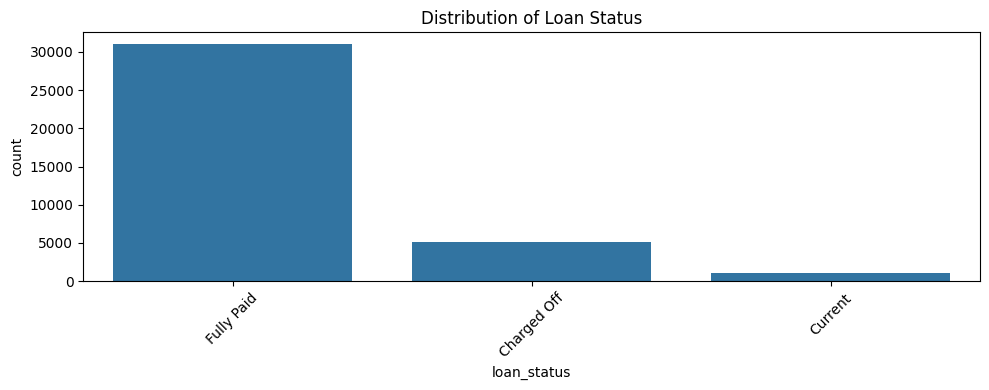

In [42]:
# Visualize individual categorical feature: loan_status
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title("Distribution of Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

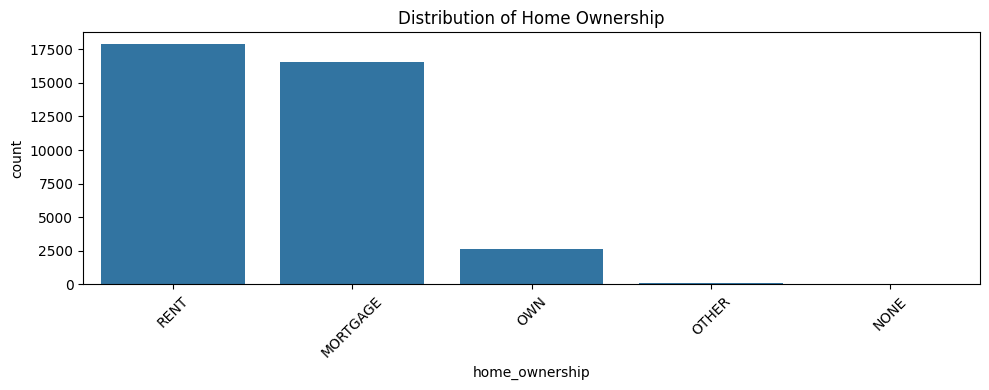

In [43]:
# Visualize individual categorical feature: home_ownership
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='home_ownership', order=df['home_ownership'].value_counts().index)
plt.title("Distribution of Home Ownership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

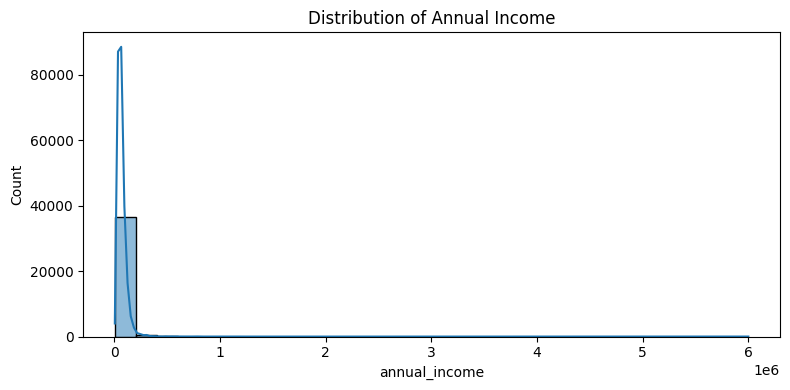

In [44]:
# Visualize individual numerical feature: annual_income
plt.figure(figsize=(8, 4))
sns.histplot(df['annual_income'], kde=True, bins=30)
plt.title("Distribution of Annual Income")
plt.tight_layout()
plt.show()

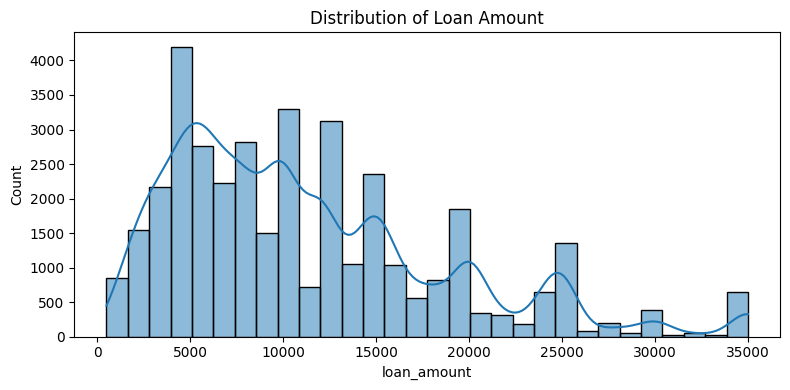

In [45]:
# Visualize individual numerical feature: loan_amount
plt.figure(figsize=(8, 4))
sns.histplot(df['loan_amount'], kde=True, bins=30)
plt.title("Distribution of Loan Amount")
plt.tight_layout()
plt.show()

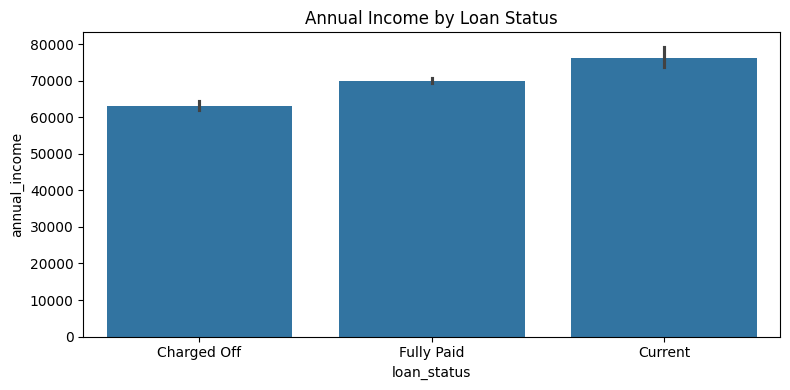

In [46]:
# Box plot: annual_income vs loan_status
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='loan_status', y='annual_income')
plt.title("Annual Income by Loan Status")
plt.tight_layout()
plt.show()

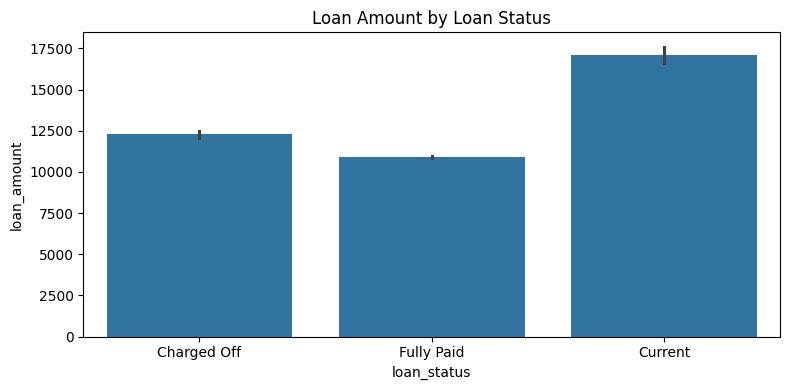

In [47]:
# Box plot: loan_amount vs loan_status
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='loan_status', y='loan_amount')
plt.title("Loan Amount by Loan Status")
plt.tight_layout()
plt.show()

In [48]:
df.columns

Index(['address_state', 'application_type', 'emp_length', 'grade',
       'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'purpose',
       'sub_grade', 'term', 'verification_status', 'annual_income', 'dti',
       'int_rate', 'loan_amount'],
      dtype='object')

In [49]:
# Drop unnecessary columns
cols_to_drop = ['id', 'member_id', 'emp_title', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date','address_state','sub_grade','term']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

In [50]:
# Define the mappings 
mappings = {
    'application_type': {'INDIVIDUAL': 0},
    'emp_length': {
        '10+ years': 0, '2 years': 1, '< 1 year': 2, '3 years': 3, '4 years': 4, '5 years': 5,
        '1 year': 6, '6 years': 7, '7 years': 8, '8 years': 9, '9 years': 10
    },
    'grade': {'B': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
    'home_ownership': {'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3, 'NONE': 4},
    'purpose': {
        'Debt consolidation': 0, 'credit card': 1, 'other': 2, 'home improvement': 3,
        'major purchase': 4, 'small business': 5, 'car': 6, 'wedding': 7, 'medical': 8,
        'moving': 9, 'house': 10, 'vacation': 11, 'educational': 12, 'renewable_energy': 13
    },
    'verification_status': {'Not Verified': 0, 'Verified': 1, 'Source Verified': 2}
}

# Apply mapping to each relevant column in your DataFrame
for col, mapping in mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)


In [51]:
# Define features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [52]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train

,application_type,emp_length,grade,home_ownership,purpose,verification_status,annual_income,dti,int_rate,loan_amount
1719,0,10,3,1,1,0,70000.0,0.1020,0.1217,8000
28100,0,5,0,0,4,0,48000.0,0.0225,0.1269,2250
29128,0,6,0,0,4,0,24000.0,0.1845,0.1149,11200
3704,0,9,1,1,1,2,30000.0,0.2696,0.0729,3000
9870,0,3,1,0,0,0,56000.0,0.1961,0.0599,9000
...,...,...,...,...,...,...,...,...,...,...
16850,0,8,2,1,0,1,114996.0,0.1611,0.1349,5000
6265,0,4,0,0,1,1,100000.0,0.1097,0.1242,35000
11284,0,4,0,0,0,0,48879.0,0.1854,0.1242,5000
860,0,10,3,1,6,1,93500.0,0.2237,0.1483,6250


In [54]:
y_train

1719     Charged Off
28100     Fully Paid
29128     Fully Paid
3704      Fully Paid
9870      Fully Paid
            ...     
16850     Fully Paid
6265         Current
11284     Fully Paid
860       Fully Paid
15795    Charged Off
Name: loan_status, Length: 29714, dtype: object

In [55]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Predict on test set
y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(accuracy_score(y_test, y_pred))


--- Classification Report ---
0.8348364517431687


In [57]:
import pickle

In [58]:
with open('Bankmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [59]:
X_train

,application_type,emp_length,grade,home_ownership,purpose,verification_status,annual_income,dti,int_rate,loan_amount
1719,0,10,3,1,1,0,70000.0,0.1020,0.1217,8000
28100,0,5,0,0,4,0,48000.0,0.0225,0.1269,2250
29128,0,6,0,0,4,0,24000.0,0.1845,0.1149,11200
3704,0,9,1,1,1,2,30000.0,0.2696,0.0729,3000
9870,0,3,1,0,0,0,56000.0,0.1961,0.0599,9000
...,...,...,...,...,...,...,...,...,...,...
16850,0,8,2,1,0,1,114996.0,0.1611,0.1349,5000
6265,0,4,0,0,1,1,100000.0,0.1097,0.1242,35000
11284,0,4,0,0,0,0,48879.0,0.1854,0.1242,5000
860,0,10,3,1,6,1,93500.0,0.2237,0.1483,6250


In [60]:
# Prepare input array
import numpy as np
user_data = np.array([[0,5,0,0,4,0,48000.0,0.0225,0.1269,2250]])

In [61]:
# Load the saved model and make prediction
model = pickle.load(open('Bankmodel.pkl', 'rb'))

In [62]:
prediction = model.predict(user_data)

c:\Users\Huzef\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
prediction

array(['Fully Paid'], dtype=object)